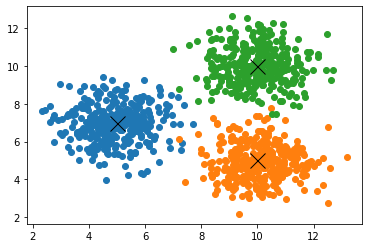

In [1]:
from scipy.stats import multivariate_normal

import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_blobs

centers = np.array([[5,7],
                  [10,5],
                  [10,10]])
X, y = make_blobs(n_samples=1000, centers=centers, n_features=2, random_state=0)

for i in range(3):
    plt.plot(X[y==i,0], X[y==i,1], 'o')
for i in range(3):
    plt.plot(centers[i,0], centers[i,1], 'kx', markersize = 15)

# GMM

Algorithm
![](kmeans.png)

EM
![](EM.png)

In [2]:
def GMM(X, K):
    # initialization
    prior = np.array([1/K] * K)

    S = np.array(
        [[[1,0],[0,1]]
        for i in range(K)])

    m = np.random.rand(K,X.shape[1])* 10
    means = []
    means.append(m)
    
    for e in range(100):
        # Expectation Step
        h = np.array([
            [multivariate_normal.pdf(x, m[i], S[i]) *  prior[i] 
            for i in range(K)] for x in X])
        h = h/h.sum(keepdims =True, axis = 1)

        # Maximisation Step
        m = np.array([(X * h[:, i:(i+1)]).sum(axis = 0) for i in range(K)])
        m = m/h.sum(keepdims =True, axis = 0).T

        S = []
        for i in range(K):
            Si = X - m[i,:]
            hi = h[:, i:(i+1)]
            Shi = Si * hi
            Shi.T.dot(Shi)
            Si = Shi.T.dot(Shi)/hi.sum()
            S.append(Si)
        S = np.array(S)

        prior = h.mean(axis = 0)
        
        # Stop if change in m is too low
        if ((means[-1] - m)**2).sum() < 0.0000001:
            break

        means.append(m)
        print(e, prior)
    return means

In [3]:
def draw(X, means, ix = 0):
    print(means[ix])
    for i in range(3):
        plt.plot(X[y==i,0], X[y==i,1], 'o')
    for i in range(3):
        plt.plot(means[ix][i,0], means[ix][i,1], 'kx', markersize = 15)

In [4]:
means = GMM(X, K = 3)

0 [0.27164825 0.33032055 0.3980312 ]
1 [0.305541   0.33070552 0.36375348]
2 [0.32253765 0.33214884 0.3453135 ]
3 [0.32705366 0.33475745 0.33818889]
4 [0.32908404 0.33537665 0.33553931]
5 [0.32994953 0.33546992 0.33458054]
6 [0.33029644 0.3354676  0.33423596]
7 [0.33043106 0.33545816 0.33411078]
8 [0.33048254 0.33545266 0.3340648 ]


[[8.41309632 4.92412753]
 [7.77290831 4.89066677]
 [9.41594932 8.56585309]]


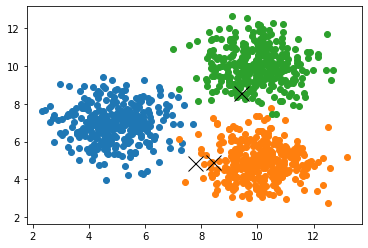

In [5]:
draw(X, means, ix = 0)

[[9.49283155 5.09877936]
 [5.83323636 6.34960325]
 [9.55381032 9.64903699]]


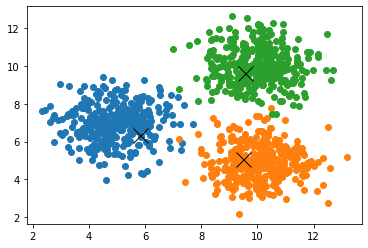

In [6]:
draw(X, means, ix = 1)

[[10.11358596  4.87325658]
 [ 5.02240086  6.79763762]
 [ 9.77918522  9.85860187]]


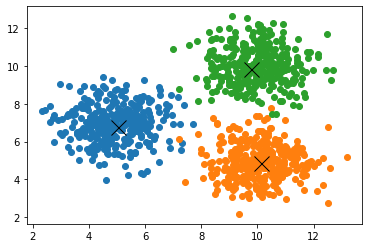

In [7]:
draw(X, means, ix = 2)

[[10.0743705   4.94086879]
 [ 4.92157043  6.9680462 ]
 [ 9.96185792 10.03630504]]


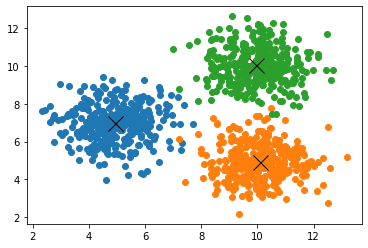

In [8]:
draw(X, means, ix = len(means) - 1)